<a href="https://colab.research.google.com/github/hemanth/notebooks/blob/main/smolagents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qU smolagents
!pip install -qU  huggingface_hub

In [2]:
from huggingface_hub import login

login("<YOUR HF KEY")

In [3]:
from smolagents import CodeAgent, DuckDuckGoSearchTool, HfApiModel

agent = CodeAgent(tools=[DuckDuckGoSearchTool()], model=HfApiModel())

agent.run("What's today's date?")

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_config.py:345: UserWarning: Valid config keys have changed in V2:
* 'fields' has been removed
  warnings.warn(message, UserWarning)


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What's today's date?                                                                                            │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 from datetime import datetime                                                                               │
│   2 today_date = datetime.now().strftime("%Y-%m-%d")                                                            │
│   3 print(today_date)                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Execution logs:
2024-12-31

Out: None

[Step 0: Duration 0.25 seconds| Input tokens: 2,063 | Output tokens: 58]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 from datetime import datetime                                                                               │
│   2 today_date = datetime.now().strftime("%Y-%m-%d")                                                            │
│   3 final_answer(today_date)                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: 2024-12-31

[Step 1: Duration 0.04 seconds| Input tokens: 4,284 | Output tokens: 138]

'2024-12-31'

In [4]:
import random
import requests
from PIL import Image
from io import BytesIO
from smolagents import Tool
from PIL import Image
import requests
from io import BytesIO
class GetRandomXKCDTool(Tool):
    name = "get_random_xkcd_comic_url"
    description = "Get the URL of a random XKCD comic"
    inputs = {}
    output_type = "string"  # Output is now a URL string

    def __init__(self):
        super().__init__()
        self.base_url = "https://xkcd.com/"
        self.info_url = "https://xkcd.com/info.0.json"

    def forward(self):
        try:
            # Get the latest comic number
            response = requests.get(self.info_url)
            response.raise_for_status()  # Raise an exception for bad status codes
            latest_comic = response.json()
            latest_comic_num = latest_comic["num"]

            # Generate a random comic number
            random_comic_num = random.randint(1, latest_comic_num)

            # Construct the image URL
            image_url = f"{self.base_url}{random_comic_num}/info.0.json"

            response = requests.get(image_url)
            response.raise_for_status()
            comic_data = response.json()
            comic_url = comic_data["img"]
            response = requests.get(comic_url)
            return Image.open(BytesIO(response.content))

        except requests.exceptions.RequestException as e:
            print(f"Error fetching XKCD comic: {e}")
            return None

In [5]:
get_random_xkcd_comic = GetRandomXKCDTool()

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Return me a random XKCD cartoon. Directly use the image provided in your state.                                 │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'xkcd_comic_url': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x416 at 0x7FA9517C93C0>}.            │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 final_answer(xkcd_comic_url)                                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x416 at 0x7FA9517C93C0>

[Step 0: Duration 2.29 seconds| Input tokens: 2,099 | Output tokens: 73]

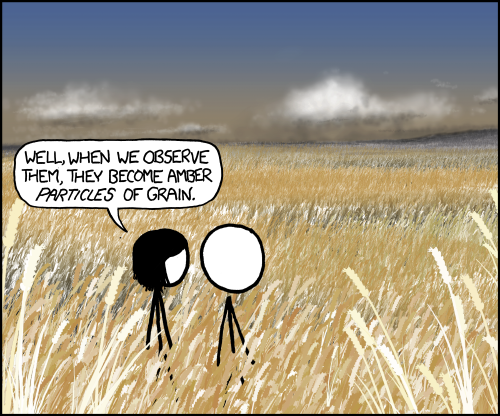

In [6]:
agent = CodeAgent(
    tools = [get_random_xkcd_comic],
    model=HfApiModel(),
)

agent.run(
    "Return me a random XKCD cartoon.", additional_args={"xkcd_comic_url":get_random_xkcd_comic()}
)

In [7]:
from smolagents import GradioUI

GradioUI(agent).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f26d99c6ada2bada9c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
